Neural Network to predict Handwritten Digits.
The Project analyses and employs Hyperparamter Tuning and Early Stopping to achieve more than 97%

### Importing relevant libraries

In [1]:
import pickle as cPickle, gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from livelossplot import PlotLossesKeras
from keras.callbacks import EarlyStopping

### Loading the dataset
The pickled file ('mnist-1.pkl.gz') represents a tuple of 3 lists : the training set, the validation set and
the test set.

In [17]:
f = gzip.open('mnist-1.pkl.gz', 'rb')
u = cPickle._Unpickler(f)
u.encoding = 'latin1'
train, val, test = u.load()
f.close()

### Analyzing the data

In [3]:
train

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, ..., 8, 4, 8], dtype=int64))

So, the data in above set(s) is arranged in two lists - <br>
- list_1 has multiple lists of digit data <br>
- list_2 has the digit that a single list in list_1 represents.

Let's split these as features (X) and labels (y) for all three of the train, val and test sets.

In [29]:
X_train = train[0]
y_train = train[1]
X_val = val[0]
y_val = val[1]
X_test = test[0]
y_test = test[1]

Reshaping the train sets to make them suitable to be fed to the neural network. 

An image is represented as numpy 1-dimensional array of 784 (28 x 28) float values between 0 and 1 (0 stands for black, 1 for white).

In [30]:
X_train = X_train.reshape(-1,28,28)
X_val = X_val.reshape(-1,28,28)
X_test = X_test.reshape(-1,28,28)

In [31]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_val = X_val.reshape((X_val.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

The labels are numbers between 0 and 9 indicating which digit the image represents.

We will perform one hot encoding on our labels such that for a given image data, the correct digit will be labelled as 1, and all others will be labelled as 0. 

The Keras API provides a to_categorical() method that can be used to one-hot encode integer data.

In [32]:
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

### Hyperparameter Tuning
We will make a neural network with one hidden layer.
The number of neurons in the hidden layers of a neural network is one of the most important hyperparameter of the model, besides number of hidden layers.

For this project, the nodes(neurons) in the hidden layer can be altered using the function neural_network() which takes the number of nodes in hidden layer as an argument.

### Early Stoppinng

I have selected 30 as the number of epochs for training the model. Judging by the complexity of the dataset, 30 epochs can end up being more than required. The biggest downside for this would be **Overfitting**.

This is where the practice of Early Stopping comes in. It is generally applied on the validation set. What early stopping does is that it identifies the epoch where the model performance stops improving on the validation set and stops the training without going through the rest of the epochs. This way we avoid the model from overfitting on to the training set.

We will implement Keras' EarlyStopping callback while fitting the model. 
One important thing is that the first sign of the model not improving may not indicate the correct time to stop training. Thus, we add an allowance or a delay for the number of epochs we can acccept no improvement before stopping the training. For this we can use the “patience” argument of Keras' EarlyStopping callback.

In [8]:
def neural_network(nodes):
    model = Sequential()
    model.add(Dense(32, input_dim = 28 * 28, activation= 'relu'))
    model.add(Dense(nodes, activation = 'relu'))
    model.add(Dense(10, activation  = 'softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 3)
    model.fit(X_train, y_train, epochs= 30, batch_size = 100, validation_data=(X_val, y_val),callbacks=[PlotLossesKeras(),es])

### Training and Validation Performance Plots

Below we can view the training performance in terms of loss and accuracy on the training and validation sets, as a function of the number of epochs.

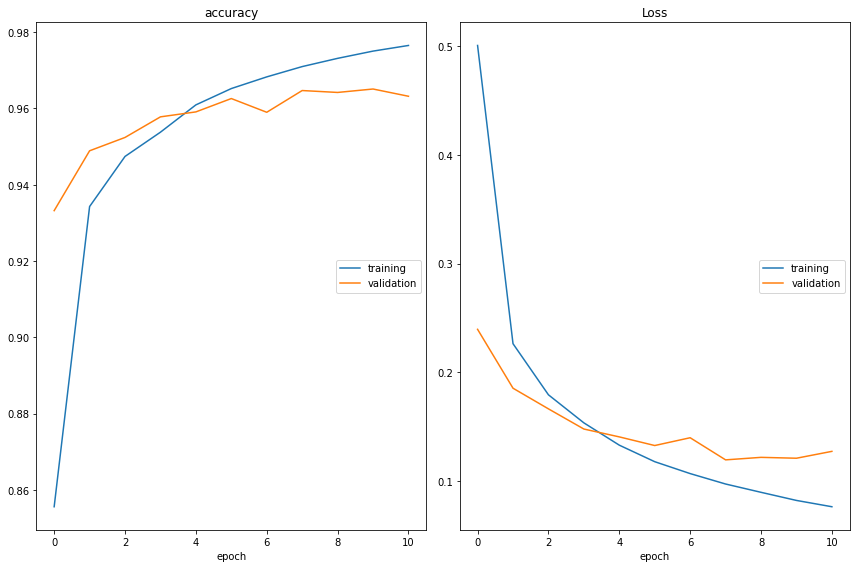

accuracy
	training         	 (min:    0.856, max:    0.977, cur:    0.977)
	validation       	 (min:    0.933, max:    0.965, cur:    0.963)
Loss
	training         	 (min:    0.077, max:    0.501, cur:    0.077)
	validation       	 (min:    0.120, max:    0.240, cur:    0.127)
500/500 [==============================] - 1s 2ms/step - loss: 0.0765 - accuracy: 0.9765 - val_loss: 0.1274 - val_accuracy: 0.9632
Epoch 11: early stopping


In [9]:
neural_network(32)

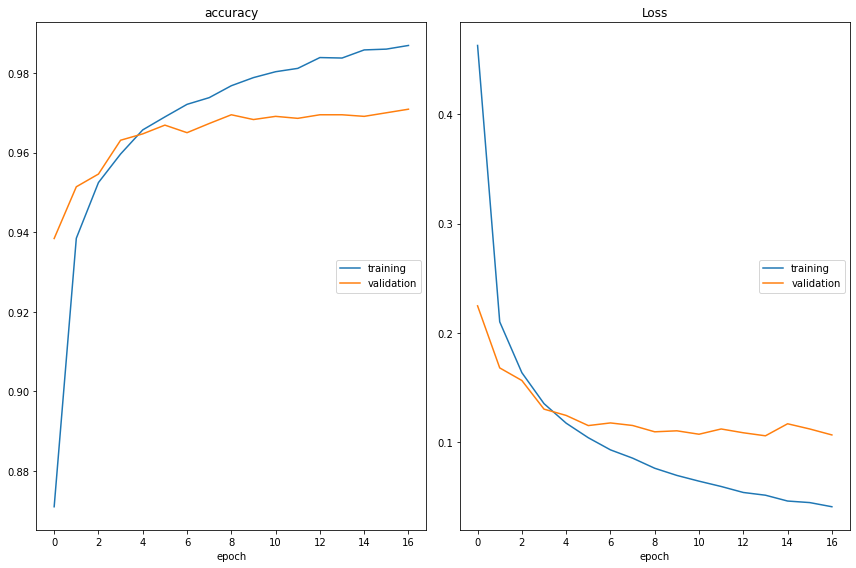

accuracy
	training         	 (min:    0.871, max:    0.987, cur:    0.987)
	validation       	 (min:    0.938, max:    0.971, cur:    0.971)
Loss
	training         	 (min:    0.041, max:    0.463, cur:    0.041)
	validation       	 (min:    0.106, max:    0.225, cur:    0.107)
500/500 [==============================] - 1s 2ms/step - loss: 0.0412 - accuracy: 0.9869 - val_loss: 0.1068 - val_accuracy: 0.9709
Epoch 17: early stopping


In [10]:
neural_network(64)

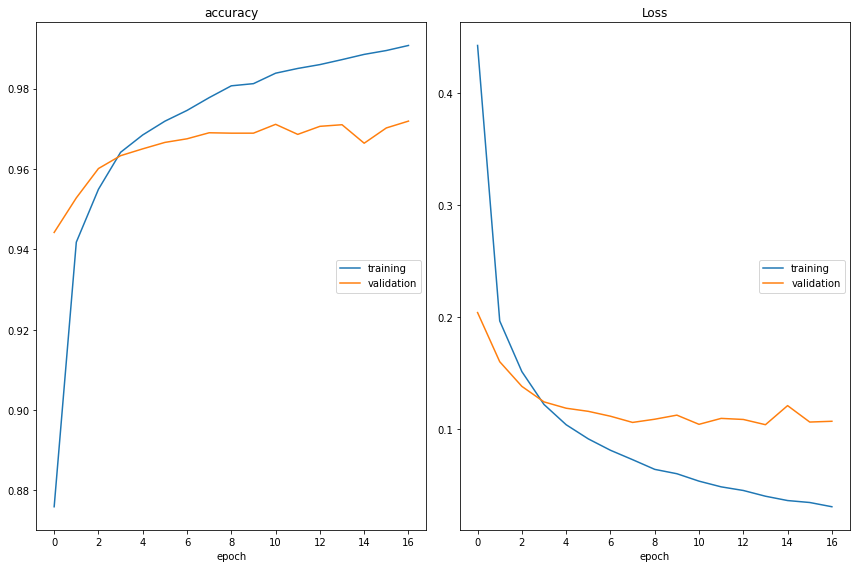

accuracy
	training         	 (min:    0.876, max:    0.991, cur:    0.991)
	validation       	 (min:    0.944, max:    0.972, cur:    0.972)
Loss
	training         	 (min:    0.031, max:    0.443, cur:    0.031)
	validation       	 (min:    0.104, max:    0.204, cur:    0.107)
500/500 [==============================] - 1s 2ms/step - loss: 0.0306 - accuracy: 0.9907 - val_loss: 0.1070 - val_accuracy: 0.9719
Epoch 17: early stopping


In [11]:
neural_network(128)

**Best Accuracy on Validation: 97.1%**

We can see that the for 64 and 128 nodes in the hidden layer the model provided around 97% accuracy. We can go ahead with 64 neurons, it being the model with less neurons, giving the same performance. 

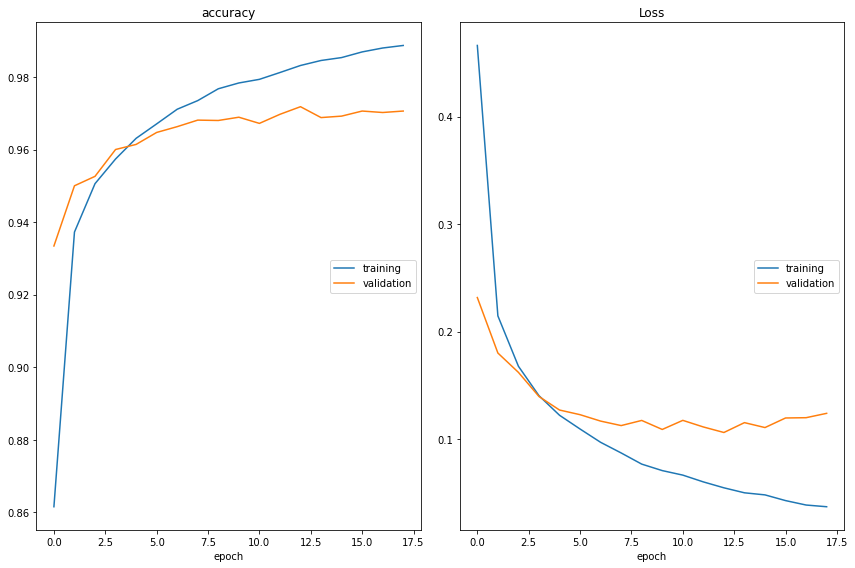

accuracy
	training         	 (min:    0.862, max:    0.989, cur:    0.989)
	validation       	 (min:    0.933, max:    0.972, cur:    0.971)
Loss
	training         	 (min:    0.037, max:    0.466, cur:    0.037)
	validation       	 (min:    0.106, max:    0.232, cur:    0.124)
500/500 [==============================] - 1s 2ms/step - loss: 0.0372 - accuracy: 0.9887 - val_loss: 0.1240 - val_accuracy: 0.9706
Epoch 18: early stopping


In [12]:
model = Sequential()
model.add(Dense(32, input_dim = 28 * 28, activation= 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation  = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)
model.fit(X_train, y_train, epochs= 30, batch_size = 100, validation_data=(X_val, y_val),callbacks=[PlotLossesKeras(),es])

### Evaluation

Now we'll test our selected model on the test set and see the accuracy we achieve.

In [13]:
scores = model.evaluate(X_test, y_test)
print('Accuracy: ',scores[1] * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1048 - accuracy: 0.9722
Accuracy:  97.21999764442444


**Accuracy on Test: 97.2%**

### Visualizing the results

Comparing vizually the handwritten digit in the test data with our prediction for that data

In [33]:
y_pred = model.predict([X_test])
y_digit_prediction = np.argmax(y_pred,axis = 1)   # Interpreting the digit from our predictions y_pred on test set

In [40]:
X_test_viewer = test[0].copy()  
X_test_viewer = X_test_viewer.reshape(-1,28,28,1)  # For viewing the handwritten digit in our test set

### Below are the first 9 handwritten digits in the test set, along with our model's prediction for that data -

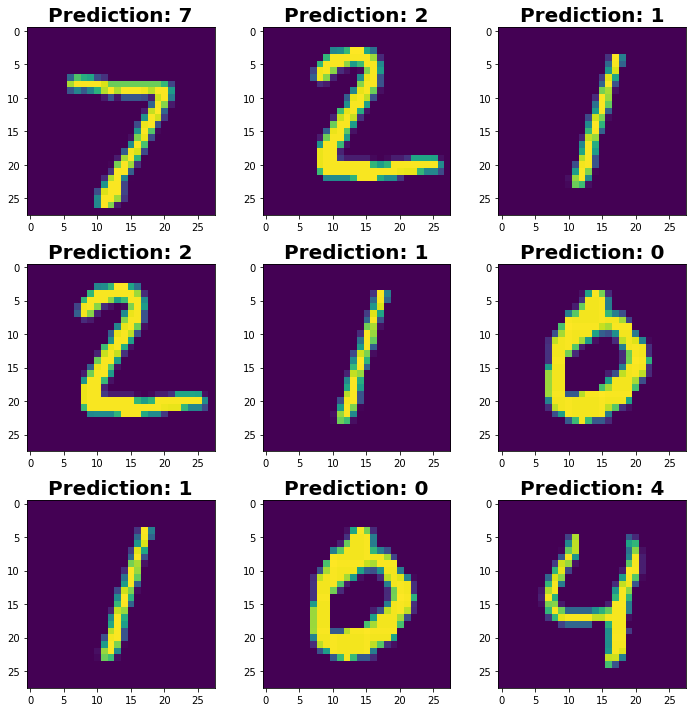

In [66]:
fig, ax = plt.subplots(3,3,figsize=(10,10))
for row in range(3):
    for col in range(3):
        ax[row,col].imshow(X_test_viewer[row+col][:,:,0])
        ax[row,col].set_title("Prediction: {}".format(y_digit_prediction[row+col]),fontweight="bold", size=20)
        
fig.tight_layout()